# Tutorial 2 - Read, manipulate and analyze the 1B or 1C PMW products

First, let's import the package required in this tutorial.

In [1]:
import gpm_api
import datetime

Let's have a look at the available PMW products:

In [2]:
from gpm_api.io.products import GPM_PMW_1B_RS_products, GPM_PMW_1C_RS_products
GPM_PMW_1C_RS_products()

['1C-TMI',
 '1C-GMI',
 '1C-SSMI-F08',
 '1C-SSMI-F10',
 '1C-SSMI-F11',
 '1C-SSMI-F13',
 '1C-SSMI-F14',
 '1C-SSMI-F15',
 '1C-SSMIS-F16',
 '1C-SSMIS-F17',
 '1C-SSMIS-F18',
 '1C-SSMIS-F19',
 '1C-AMSR2-GCOMW1',
 '1C-AMSRE-AQUA',
 '1C-AMSUB-NOAA15',
 '1C-AMSUB-NOAA16',
 '1C-AMSUB-NOAA17',
 '1C-SAPHIR-MT1',
 '1C-MHS-METOPA',
 '1C-MHS-METOPB',
 '1C-MHS-METOPC',
 '1C-MHS-NOAA18',
 '1C-MHS-NOAA19',
 '1C-ATMS-NOAA20',
 '1C-ATMS-NPP']

# 1. Data download

Now let's download a 1C PMW product over a couple of hours.

In [3]:
# Specify the base directory where you want to download the data
base_dir = "/home/ghiggi/GPM"  
# Specify the time period you are interested in 
start_time = datetime.datetime.strptime("2020-08-01 12:00:00", "%Y-%m-%d %H:%M:%S")
end_time = datetime.datetime.strptime("2020-08-02 12:00:00", "%Y-%m-%d %H:%M:%S")
# Specify the product and product type 
product = "1C-MHS-METOPB" # 1C-GMI, 1C-SSMIS-F17, ...
product_type = "RS"    
# Specify the version
version = 7
# Specify you PPS username 
username = "gionata.ghiggi@epfl.ch"

# Download the data
gpm_api.download(
    base_dir=base_dir,
    username=username,
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    force_download=False,
    verbose=True,
    progress_bar=True,
    check_integrity=False,
)


0it [00:00, ?it/s]
0it [00:00, ?it/s]

Download of available GPM 1C-MHS-METOPB product completed.


Once, the data are downloaded on disk, let's load the 1C product and look at the dataset structure.

## 2. Data Loading

In [4]:
# Load the 1C dataset
# - If chunks is not None, it does not load the data in RAM memory !
# - If scan_mode is not specified, it automatically load one! 
ds = gpm_api.open_dataset(
    base_dir=base_dir,
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    chunks="auto",
)
ds

/home/ghiggi/Python_Packages/gpm_api/gpm_api/io/dataset.py:475: GPM_Warning: 'The GPM granule /home/ghiggi/GPM/RS/V07/PMW/1C-MHS-METOPB/2020/08/02/1C.METOPB.MHS.XCAL2016-V.20200802-S032245-E050405.040851.V07A.HDF5 has non-contiguous scans !'
  warnings.warn(msg, GPM_Warning)


GPM 1C-MHS-METOPB has been loaded successfully !


<xarray.Dataset>
Dimensions:                           (cross_track: 90, along_track: 32400,
                                       nchUIA1: 1, channel: 5)
Coordinates:
    lon                               (cross_track, along_track) float32 ...
    lat                               (cross_track, along_track) float32 ...
    time                              (along_track) datetime64[ns] 2020-08-01...
    gpm_id                            (along_track) <U10 ...
    gpm_granule_id                    (along_track) int64 ...
    gpm_cross_track_id                (cross_track) int64 ...
    gpm_along_track_id                (along_track) int64 ...
Dimensions without coordinates: cross_track, along_track, nchUIA1, channel
Data variables:
    sunLocalTime                      (cross_track, along_track) timedelta64[ns] dask.array<chunksize=(90, 237), meta=np.ndarray>
    Quality                           (cross_track, along_track) float64 dask.array<chunksize=(90, 237), meta=np.ndarray>
    incidenceAngle                    (cross_track, along_track, nchUIA1) float32 dask.array<chunksize=(90, 237, 1), meta=np.ndarray>
    sunGlintAngle                     (cross_track, along_track, nchUIA1) float64 dask.array<chunksize=(90, 237, 1), meta=np.ndarray>
    incidenceAngleIndex               (cross_track, along_track, channel) float64 dask.array<chunksize=(90, 237, 5), meta=np.ndarray>
    Tc                                (cross_track, along_track, channel) float32 dask.array<chunksize=(90, 237, 5), meta=np.ndarray>
    SCstatus/SCorientation            (cross_track, along_track) float64 dask.array<chunksize=(90, 237), meta=np.ndarray>
    SCstatus/SClatitude               (cross_track, along_track) float32 dask.array<chunksize=(90, 237), meta=np.ndarray>
    SCstatus/SClongitude              (cross_track, along_track) float32 dask.array<chunksize=(90, 237), meta=np.ndarray>
    SCstatus/SCaltitude               (cross_track, along_track) float32 dask.array<chunksize=(90, 237), meta=np.ndarray>
    SCstatus/FractionalGranuleNumber  (cross_track, along_track) float64 dask.array<chunksize=(90, 237), meta=np.ndarray>
Attributes:
    InstrumentName:    MHS
    AlgorithmID:       1CMHS
    DOI:               10.5067/GPM/MHS/METOPB/1C/07
    ProductVersion:    V07A
    EmptyGranule:      NOT_EMPTY
    MissingData:       0
    ProcessingSystem:  PPS
    SatelliteName:     METOPB
    ScanMode:          S1
    gpm_api_product:   1C-MHS-METOPB

If you want to load another `scan_mode`, first have a look at the available ones:

In [5]:
gpm_api.available_scan_modes(product=product, version=version)

['S1']

and then specify the `scan_mode` argument in `open_dataset`:

In [6]:
ds = gpm_api.open_dataset(
    base_dir=base_dir,
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    scan_mode="S1",
    chunks="auto",
)
ds

/home/ghiggi/Python_Packages/gpm_api/gpm_api/io/dataset.py:475: GPM_Warning: 'The GPM granule /home/ghiggi/GPM/RS/V07/PMW/1C-MHS-METOPB/2020/08/02/1C.METOPB.MHS.XCAL2016-V.20200802-S032245-E050405.040851.V07A.HDF5 has non-contiguous scans !'
  warnings.warn(msg, GPM_Warning)


GPM 1C-MHS-METOPB has been loaded successfully !


<xarray.Dataset>
Dimensions:                           (cross_track: 90, along_track: 32400,
                                       nchUIA1: 1, channel: 5)
Coordinates:
    lon                               (cross_track, along_track) float32 ...
    lat                               (cross_track, along_track) float32 ...
    time                              (along_track) datetime64[ns] 2020-08-01...
    gpm_id                            (along_track) <U10 ...
    gpm_granule_id                    (along_track) int64 ...
    gpm_cross_track_id                (cross_track) int64 ...
    gpm_along_track_id                (along_track) int64 ...
Dimensions without coordinates: cross_track, along_track, nchUIA1, channel
Data variables:
    sunLocalTime                      (cross_track, along_track) timedelta64[ns] dask.array<chunksize=(90, 237), meta=np.ndarray>
    Quality                           (cross_track, along_track) float64 dask.array<chunksize=(90, 237), meta=np.ndarray>
    incidenceAngle                    (cross_track, along_track, nchUIA1) float32 dask.array<chunksize=(90, 237, 1), meta=np.ndarray>
    sunGlintAngle                     (cross_track, along_track, nchUIA1) float64 dask.array<chunksize=(90, 237, 1), meta=np.ndarray>
    incidenceAngleIndex               (cross_track, along_track, channel) float64 dask.array<chunksize=(90, 237, 5), meta=np.ndarray>
    Tc                                (cross_track, along_track, channel) float32 dask.array<chunksize=(90, 237, 5), meta=np.ndarray>
    SCstatus/SCorientation            (cross_track, along_track) float64 dask.array<chunksize=(90, 237), meta=np.ndarray>
    SCstatus/SClatitude               (cross_track, along_track) float32 dask.array<chunksize=(90, 237), meta=np.ndarray>
    SCstatus/SClongitude              (cross_track, along_track) float32 dask.array<chunksize=(90, 237), meta=np.ndarray>
    SCstatus/SCaltitude               (cross_track, along_track) float32 dask.array<chunksize=(90, 237), meta=np.ndarray>
    SCstatus/FractionalGranuleNumber  (cross_track, along_track) float64 dask.array<chunksize=(90, 237), meta=np.ndarray>
Attributes:
    InstrumentName:    MHS
    AlgorithmID:       1CMHS
    DOI:               10.5067/GPM/MHS/METOPB/1C/07
    ProductVersion:    V07A
    EmptyGranule:      NOT_EMPTY
    MissingData:       0
    ProcessingSystem:  PPS
    SatelliteName:     METOPB
    ScanMode:          S1
    gpm_api_product:   1C-MHS-METOPB

You can list variables, coordinates and dimensions with the following methods

In [7]:
# Available variables
variables = list(ds.data_vars)
print("Available variables: ", variables)
# Available coordinates 
coords = list(ds.coords)
print("Available coordinates: ", coords)
# Available dimensions 
dims = list(ds.dims)
print("Available dimensions: ", dims)

Available variables:  ['sunLocalTime', 'Quality', 'incidenceAngle', 'sunGlintAngle', 'incidenceAngleIndex', 'Tc', 'SCstatus/SCorientation', 'SCstatus/SClatitude', 'SCstatus/SClongitude', 'SCstatus/SCaltitude', 'SCstatus/FractionalGranuleNumber']
Available coordinates:  ['lon', 'lat', 'time', 'gpm_id', 'gpm_granule_id', 'gpm_cross_track_id', 'gpm_along_track_id']
Available dimensions:  ['cross_track', 'along_track', 'nchUIA1', 'channel']


As you see, every variable has a prefix which indicates the group in the original HDF file where the variable is stored. 
You can remove the prefix when opening the dataset by specifying `prefix_group=False`. 
You can also directly load only a subset of variables, by specifying the `variables` argument. 

In [8]:
# List some variables of interest 
variables = [
   "Tc" # "Tb" if PMW 1B product
]
# Load the dataset
ds = gpm_api.open_dataset(
    base_dir=base_dir,
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    variables=variables,
    prefix_group=False,
)
ds

/home/ghiggi/Python_Packages/gpm_api/gpm_api/io/dataset.py:475: GPM_Warning: 'The GPM granule /home/ghiggi/GPM/RS/V07/PMW/1C-MHS-METOPB/2020/08/02/1C.METOPB.MHS.XCAL2016-V.20200802-S032245-E050405.040851.V07A.HDF5 has non-contiguous scans !'
  warnings.warn(msg, GPM_Warning)


GPM 1C-MHS-METOPB has been loaded successfully !


<xarray.Dataset>
Dimensions:             (cross_track: 90, along_track: 32400, channel: 5)
Coordinates:
    lon                 (cross_track, along_track) float32 ...
    lat                 (cross_track, along_track) float32 ...
    time                (along_track) datetime64[ns] 2020-08-01T12:00:01 ... ...
    gpm_id              (along_track) <U10 ...
    gpm_granule_id      (along_track) int64 ...
    gpm_cross_track_id  (cross_track) int64 ...
    gpm_along_track_id  (along_track) int64 ...
Dimensions without coordinates: cross_track, along_track, channel
Data variables:
    Tc                  (cross_track, along_track, channel) float32 dask.array<chunksize=(90, 237, 5), meta=np.ndarray>
Attributes:
    InstrumentName:    MHS
    AlgorithmID:       1CMHS
    DOI:               10.5067/GPM/MHS/METOPB/1C/07
    ProductVersion:    V07A
    EmptyGranule:      NOT_EMPTY
    MissingData:       0
    ProcessingSystem:  PPS
    SatelliteName:     METOPB
    ScanMode:          S1
    gpm_api_product:   1C-MHS-METOPB

To select the DataArray corresponding to a single variable:

In [9]:
variable = "Tc" # "Tb" if PMW 1B product
da = ds[variable]
da

<xarray.DataArray 'Tc' (cross_track: 90, along_track: 32400, channel: 5)>
dask.array<getitem, shape=(90, 32400, 5), dtype=float32, chunksize=(90, 2281, 5), chunktype=numpy.ndarray>
Coordinates:
    lon                 (cross_track, along_track) float32 ...
    lat                 (cross_track, along_track) float32 ...
    time                (along_track) datetime64[ns] 2020-08-01T12:00:01 ... ...
    gpm_id              (along_track) <U10 ...
    gpm_granule_id      (along_track) int64 ...
    gpm_cross_track_id  (cross_track) int64 ...
    gpm_along_track_id  (along_track) int64 ...
Dimensions without coordinates: cross_track, along_track, channel
Attributes:
    units:            K
    LongName:         \nIntercalibrated Tb for channels 1) 89.0 GHz V-Pol 2) ...
    gpm_api_product:  1C-MHS-METOPB

To extract from the DataArray the numerical array you use:

In [10]:
print("Data type of numerical array: ", type(da.data))
da.data

Data type of numerical array:  <class 'dask.array.core.Array'>


dask.array<getitem, shape=(90, 32400, 5), dtype=float32, chunksize=(90, 2281, 5), chunktype=numpy.ndarray>

If the numerical array data type is `dask.Array`, it means that the data are not yet loaded into RAM memory. 
To put the data into memory, you need to call the method `compute`, either on the xarray object or on the numerical array.

In [11]:
# Option 1 
da_opt1 = da.compute()
print("Data type of numerical array: ", type(da_opt1.data))
da_opt1.data

Data type of numerical array:  <class 'numpy.ndarray'>


array([[[220.14, 240.32, 240.12, 248.39, 252.62],
        [215.58, 237.43, 239.84, 248.73, 253.22],
        [215.08, 237.21, 241.01, 249.64, 253.16],
        ...,
        [221.47, 245.54, 241.62, 249.08, 255.51],
        [222.62, 243.44, 240.98, 248.29, 252.98],
        [222.28, 236.87, 242.12, 247.95, 248.48]],

       [[221.83, 242.14, 241.5 , 249.13, 253.42],
        [219.49, 240.75, 241.05, 248.86, 253.62],
        [215.33, 238.13, 241.84, 249.65, 253.77],
        ...,
        [214.56, 237.73, 243.18, 251.11, 255.42],
        [211.54, 234.21, 244.27, 251.5 , 253.92],
        [208.45, 232.01, 245.55, 252.49, 254.66]],

       [[211.31, 235.4 , 241.56, 249.69, 253.99],
        [211.54, 235.22, 240.96, 249.91, 253.7 ],
        [210.31, 234.55, 240.93, 249.36, 254.29],
        ...,
        [205.44, 233.04, 246.47, 254.41, 258.26],
        [203.45, 231.61, 247.18, 255.02, 258.8 ],
        [202.18, 229.09, 248.61, 255.82, 258.58]],

       ...,

       [[242.22, 261.73, 236.  , 247.04, 2

In [12]:
# Option 2
print("Data type of numerical array: ", type(da.data.compute()))
da.data.compute()

Data type of numerical array:  <class 'numpy.ndarray'>


array([[[220.14, 240.32, 240.12, 248.39, 252.62],
        [215.58, 237.43, 239.84, 248.73, 253.22],
        [215.08, 237.21, 241.01, 249.64, 253.16],
        ...,
        [221.47, 245.54, 241.62, 249.08, 255.51],
        [222.62, 243.44, 240.98, 248.29, 252.98],
        [222.28, 236.87, 242.12, 247.95, 248.48]],

       [[221.83, 242.14, 241.5 , 249.13, 253.42],
        [219.49, 240.75, 241.05, 248.86, 253.62],
        [215.33, 238.13, 241.84, 249.65, 253.77],
        ...,
        [214.56, 237.73, 243.18, 251.11, 255.42],
        [211.54, 234.21, 244.27, 251.5 , 253.92],
        [208.45, 232.01, 245.55, 252.49, 254.66]],

       [[211.31, 235.4 , 241.56, 249.69, 253.99],
        [211.54, 235.22, 240.96, 249.91, 253.7 ],
        [210.31, 234.55, 240.93, 249.36, 254.29],
        ...,
        [205.44, 233.04, 246.47, 254.41, 258.26],
        [203.45, 231.61, 247.18, 255.02, 258.8 ],
        [202.18, 229.09, 248.61, 255.82, 258.58]],

       ...,

       [[242.22, 261.73, 236.  , 247.04, 2

## 3. Dataset manipulations

Now, let's first have a look at the methods provided by GPM-API

In [13]:
variable = "Tc" # "Tb" if PMW 1B product
da = ds[variable]
print("xr.Dataset gpm_api methods:", dir(ds.gpm_api))
print("")
print("xr.DataArray gpm_api methods:", dir(da.gpm_api))


xr.Dataset gpm_api methods: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_obj', 'crop', 'crop_by_continent', 'crop_by_country', 'get_slices_contiguous_scans', 'get_crop_slices_by_continent', 'get_crop_slices_by_country', 'get_crop_slices_by_extent', 'get_slices_regular_time', 'has_contiguous_scans', 'has_regular_time', 'is_grid', 'is_orbit', 'is_regular', 'is_spatial_2d', 'label_object', 'labels_patch_generator', 'plot_map', 'plot_patches', 'plot_swath_lines', 'plot_transect_line', 'pyresample_area', 'subset_by_time', 'subset_by_time_slice', 'title']

xr.DataArray gpm_api methods: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribut

You can also select a specific PMW channel with the `isel` method:

In [14]:
ds.isel(channel=0)

<xarray.Dataset>
Dimensions:             (cross_track: 90, along_track: 32400)
Coordinates:
    lon                 (cross_track, along_track) float32 ...
    lat                 (cross_track, along_track) float32 ...
    time                (along_track) datetime64[ns] 2020-08-01T12:00:01 ... ...
    gpm_id              (along_track) <U10 ...
    gpm_granule_id      (along_track) int64 ...
    gpm_cross_track_id  (cross_track) int64 ...
    gpm_along_track_id  (along_track) int64 ...
Dimensions without coordinates: cross_track, along_track
Data variables:
    Tc                  (cross_track, along_track) float32 dask.array<chunksize=(90, 237), meta=np.ndarray>
Attributes:
    InstrumentName:    MHS
    AlgorithmID:       1CMHS
    DOI:               10.5067/GPM/MHS/METOPB/1C/07
    ProductVersion:    V07A
    EmptyGranule:      NOT_EMPTY
    MissingData:       0
    ProcessingSystem:  PPS
    SatelliteName:     METOPB
    ScanMode:          S1
    gpm_api_product:   1C-MHS-METOPB

The GPM products are either ORBIT (i.e. PMW and RADAR) or GRID (i.e. IMERG) based.
You can check the support of the data with the methods `is_grid` and `is_orbit`. 

In [15]:
print("Is GPM ORBIT data?: ", ds.gpm_api.is_orbit)
print("Is GPM GRID data?: ", ds.gpm_api.is_grid)

Is GPM ORBIT data?:  True
Is GPM GRID data?:  False


To check wheter the loaded GPM PMW product has contiguous scans, you can use:

In [16]:
print(ds.gpm_api.has_contiguous_scans)
print(ds.gpm_api.is_regular)

False
False


In case there are non-contiguous scans, you can obtain the along-track slices over which the dataset is regular:

In [17]:
list_slices = ds.gpm_api.get_slices_contiguous_scans() 
print(list_slices)

[slice(0, 22204, None), slice(22205, 32400, None)]


You can then select a regular portion of the dataset with:

In [18]:
slc = list_slices[0]
print(slc)

slice(0, 22204, None)


In [19]:
ds_regular = ds.isel(along_track=slc)
ds_regular.gpm_api.is_regular

True

To instead check if the open dataset has a single or multiple timestep, you can use: 

In [20]:
ds.gpm_api.is_spatial_2d # because the xr.Dataset also contains the channel dimension ! 

False

In [21]:
ds.isel(channel=0).gpm_api.is_spatial_2d

True

## 4. Product visualization

The GPM-API provides two ways of displaying the data:
- The `plot_map` method plot the data in a geographic projection using the Cartopy `pcolormesh` method
- The `plot_image` method plot the data as an image using the Maplotlib `imshow` method

Let's start by plotting the PMW scan in the geographic space

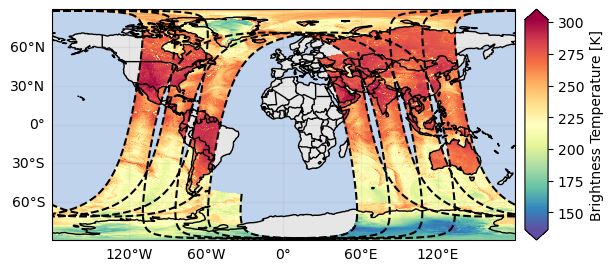

In [22]:
da = ds[variable].isel(channel=0).isel(along_track=slice(0,8000))
da.gpm_api.plot_map()     

and now as an image, in "swath" view:

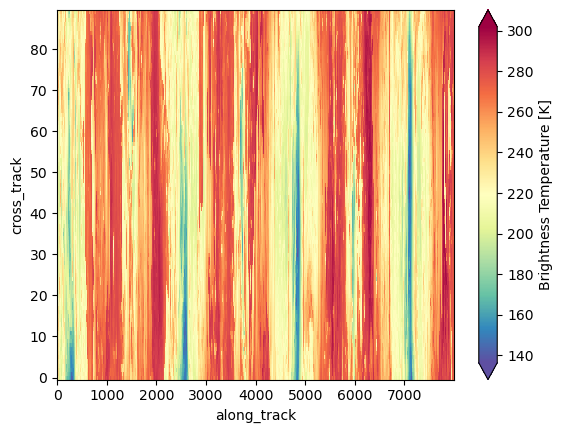

In [23]:
da.gpm_api.plot_image()

To facilitate the creation of a figure title, GPM-API also provide a `title` method:

In [24]:
# Title for a single-timestep dataset
print(ds[variable].gpm_api.title(add_timestep=True))
print(ds[variable].gpm_api.title(add_timestep=False))

1C-MHS-METOPB Tc (2020-08-02 00:00)
1C-MHS-METOPB Tc


To instead zoom on a specific regions of a `plot_map` figure, you can use the axis method `set_extent`. 
Note that render the image with this approach can be quite slow, because `plot_map` plots all the data, and then restrict the figure extent over the area of interest. For a more efficient approach, see section `6. Dataset cropping`. 

Extent:  (-171.99111060299998, -66.76465999999999, 18.71619, 71.5577635769)


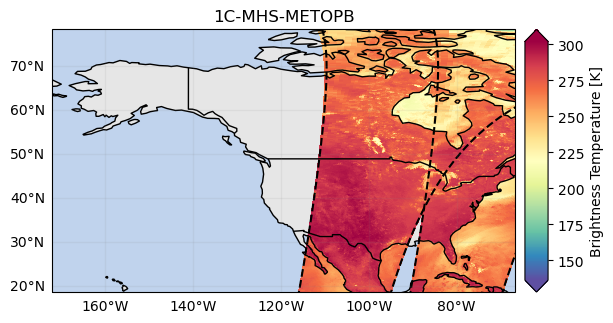

In [25]:
from gpm_api.utils.countries import get_country_extent
title = ds.gpm_api.title(add_timestep=False)
extent = get_country_extent("United States")
print("Extent: ", extent)
da = ds[variable].isel(channel=0, along_track=slice(0, 8000))
p = da.gpm_api.plot_map()  
_ = p.axes.set_extent(extent)
_ = p.axes.set_title(label=title)

You can also customize the geographic projection, by specifying the wished Cartopy projection.
The available projections are [listed here]( https://scitools.org.uk/cartopy/docs/latest/reference/projections.html?highlight=projections)

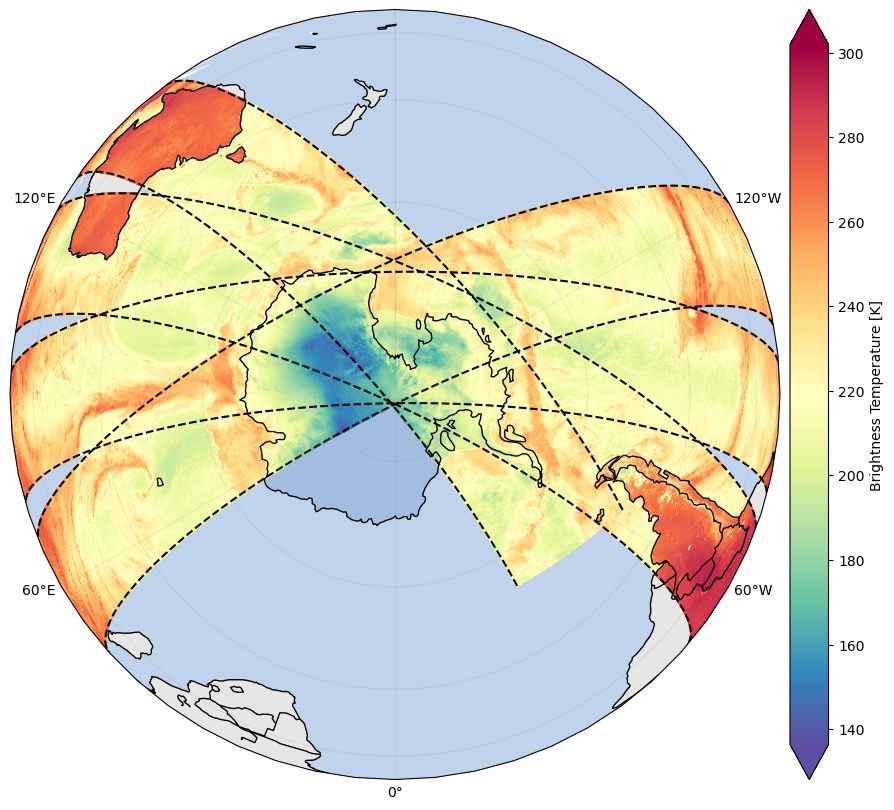

In [26]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from gpm_api.visualization.plot import plot_cartopy_background

# Define some figure options
dpi = 100
figsize = (12, 10)

# Example of polar Cartopy projection
crs_proj = ccrs.Orthographic(180, -90)

# Subset the data for fast rendering and select single channel
da = ds[variable].isel(channel=0, along_track=slice(0, 8000))

# Create the map
fig, ax = plt.subplots(subplot_kw={"projection": crs_proj}, figsize=figsize, dpi=dpi)
plot_cartopy_background(ax)
da.gpm_api.plot_map(ax=ax)
ax.set_global()

It is possible to further customize these figures in multiply ways. For example by specifying the own colormap:

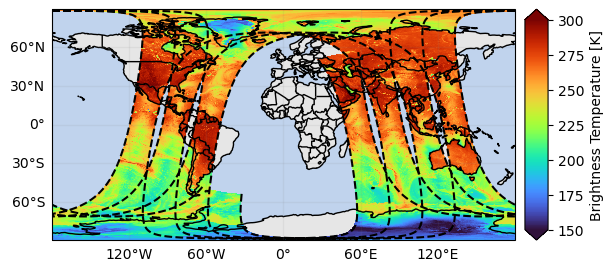

In [32]:
da.gpm_api.plot_map(cmap="turbo", vmin=150, vmax=300)

## 5. Dataset cropping

GPM-API provides methods to easily spatially subset orbits by extent, country or continent.
Note however, that an area can be crossed by multiple orbits. In other words, multiple orbit slices in along-track direction can interesect the area of interest. The method `get_crop_slices_by_extent`, `get_crop_slices_by_country` and ` get_crop_slices_by_continent` enable to retrieve the orbit portions intersecting the area of interest. 

[slice(3770, 4117, None), slice(6029, 6398, None)]


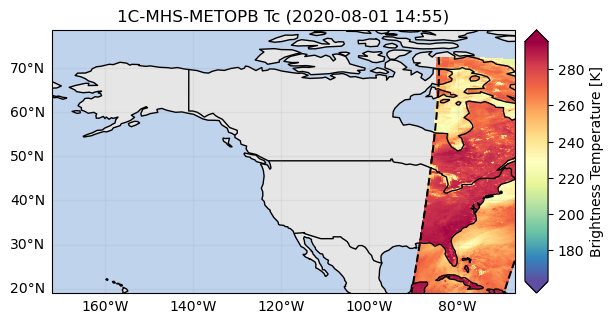

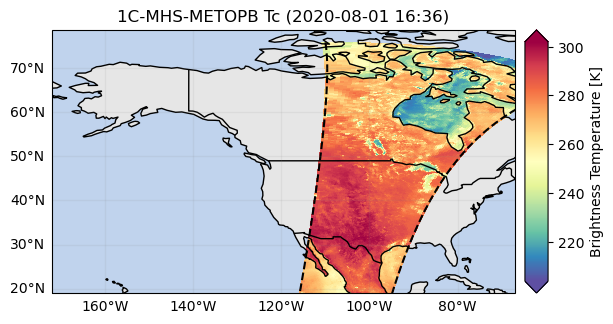

In [28]:
# Subset the data for fast rendering and select single channel
da = ds[variable].isel(channel=0, along_track=slice(0, 8000))

# Crop by extent                                      
extent = (-172, -67, 19, 72) # (xmin, xmax, ymin, ymax)
list_slices = da.gpm_api.get_crop_slices_by_extent(extent)
print(list_slices)
for slc in list_slices:
    da_subset = da.isel(along_track=slc)
    slice_title = da_subset.gpm_api.title(add_timestep=True)
    p = da_subset.gpm_api.plot_map()  
    p.axes.set_extent(extent)
    p.axes.set_title(label=slice_title)


[slice(3772, 4119, None), slice(6030, 6400, None)]
[slice(3772, 4119, None), slice(6030, 6400, None)]


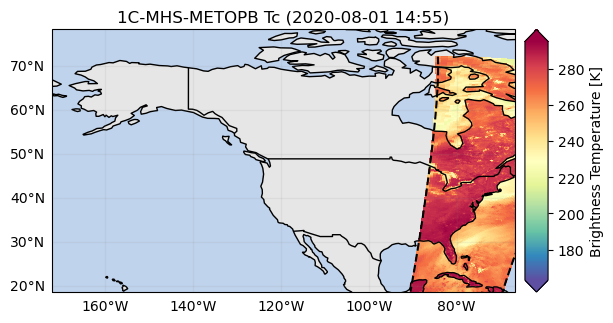

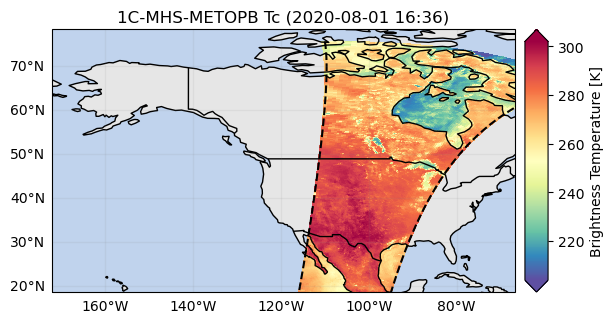

In [29]:
# Crop by country
# - Option 1
list_slices = da.gpm_api.get_crop_slices_by_country("United States")
print(list_slices)
# - Option 2
from gpm_api.utils.countries import get_country_extent 
extent = get_country_extent("United States")
list_slices = da.gpm_api.get_crop_slices_by_extent(extent)
print(list_slices)
# - Plot the swath crossing the country
for slc in list_slices:
    da_subset = da.isel(along_track=slc)
    slice_title = da_subset.gpm_api.title(add_timestep=True)
    p = da_subset.gpm_api.plot_map()
    p.axes.set_extent(extent)
    p.axes.set_title(label=slice_title)

[slice(0, 87, None), slice(1836, 2340, None), slice(4116, 4602, None)]
[slice(0, 87, None), slice(1836, 2340, None), slice(4116, 4602, None)]


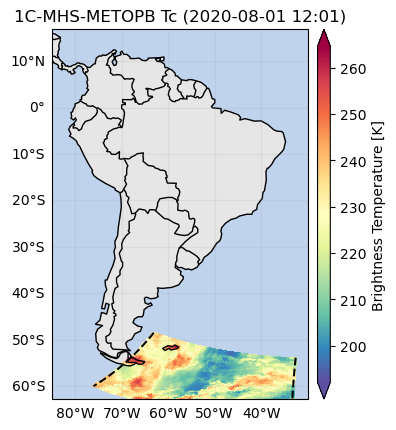

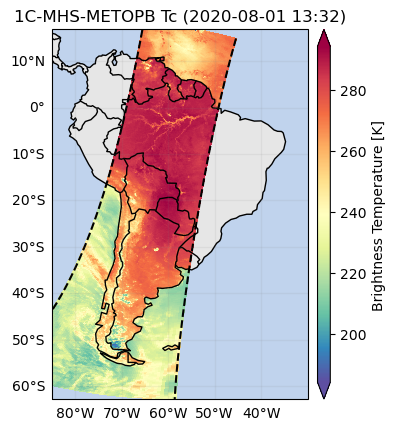

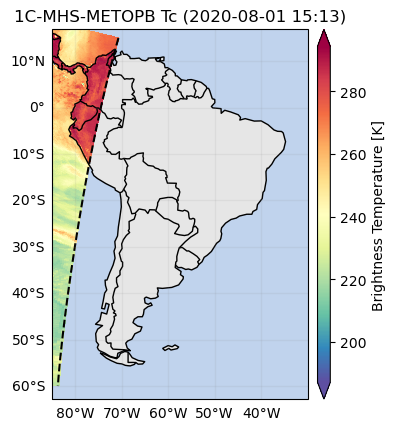

In [30]:
# Crop by continent          
# - Option 1
list_slices = da.gpm_api.get_crop_slices_by_continent("South America")
print(list_slices)
# - Option 2
from gpm_api.utils.continents import get_continent_extent 
extent = get_continent_extent("South America")
list_slices = da.gpm_api.get_crop_slices_by_extent(extent)
print(list_slices)
# - Plot the swath crossing the country
for slc in list_slices:
    da_subset = da.isel(along_track=slc)
    slice_title = da_subset.gpm_api.title(add_timestep=True)
    p = da_subset.gpm_api.plot_map() 
    p.axes.set_extent(extent)
    p.axes.set_title(label=slice_title)
